In [70]:
import pandas as pd

sales_doc = "../doccuments/sales_and_eodStocks.xlsx"
transactions_doc = "../doccuments/transactions.xlsx"

sales_df = pd.read_excel(sales_doc)
transactions_df = pd.read_excel(transactions_doc)

In [71]:
print(sales_df.head())

  Product_ID       Date  Sales  Revenue  EndOfDayStock
0      10002 2009-12-01     12    10.20          48692
1      10002 2009-12-03      7     5.95          48685
2      10002 2009-12-04     73    62.05          48612
3      10002 2009-12-06     49    41.65          48563
4      10002 2009-12-07      2     1.70          48561


In [72]:
print(transactions_df.head())

   Invoice Product_ID                          Description  Quantity  \
0   489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434     79323P                   PINK CHERRY LIGHTS        12   
2   489434     79323W                  WHITE CHERRY LIGHTS        12   
3   489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

                 Date  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  


In [73]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
#
# def scale_data(df, columns, method='standardization'):
#     """
#     Scale the specified columns of the dataframe using the chosen method.
#
#     Parameters:
#     df (pandas.DataFrame): The dataframe containing the data.
#     columns (list): List of column names to be scaled.
#     method (str): The scaling method - 'standardization' or 'normalization'.
#
#     Returns:
#     pandas.DataFrame: The dataframe with the specified columns scaled.
#     """
#     scaler = StandardScaler() if method == 'standardization' else MinMaxScaler()
#
#     # Scale only the specified columns
#     df_scaled = df.copy()
#     df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
#
#     return df_scaled
#
# # Example usage
# # Assuming df is your DataFrame and you want to scale 'Sales' and 'Revenue'
# scaled_df = scale_data(sales_df, ['Sales', 'Revenue'], method='minmax')
# print(scaled_df[scaled_df['Revenue'] == scaled_df['Revenue'].max()])


In [74]:
# from statsmodels.tsa.stattools import adfuller
# import matplotlib.pyplot as plt
#
# # Filter the data for one specific product
# product_data = scaled_df[scaled_df['Product_ID'] == scaled_df['Product_ID'].unique()[0]].copy()
#
# # Set the Date as the index
# product_data.set_index('Date', inplace=True)
#
# # Focus on the Sales column for ARIMA
# sales_data = product_data['Sales']
#
# # Check for stationarity
# def test_stationarity(timeseries):
#     # Determining rolling statistics
#     rolmean = timeseries.rolling(window=12).mean()
#     rolstd = timeseries.rolling(window=12).std()
#
#     # Plot rolling statistics
#     plt.figure(figsize=(12, 6))
#     plt.plot(timeseries, color='blue',label='Original')
#     plt.plot(rolmean, color='red', label='Rolling Mean')
#     plt.plot(rolstd, color='black', label='Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
#
#     # Perform Dickey-Fuller test
#     print("Results of Dickey-Fuller Test:")
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)' % key] = value
#     return dfoutput
#
# # Testing stationarity
# test_stationarity(sales_data)


In [75]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#
# # Plot ACF and PACF
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plot_acf(sales_data, ax=plt.gca(), lags=20)
# plt.title('Autocorrelation Function')
#
# plt.subplot(122)
# plot_pacf(sales_data, ax=plt.gca(), lags=20)
# plt.title('Partial Autocorrelation Function')
#
# plt.tight_layout()
# plt.show()


In [76]:
# from statsmodels.tsa.arima.model import ARIMA
#
# # Fit the ARIMA model
# model = ARIMA(sales_data, order=(1, 0, 1))
# model_fit = model.fit()
#
# # Summary of the model
# model_summary = model_fit.summary()
# # Model Diagnostics
# model_diagnostics = model_fit.plot_diagnostics(figsize=(15, 12))
# plt.show()
#
# # Forecasting with the model
# # For demonstration, let's forecast the next 10 periods
# forecast = model_fit.get_forecast(steps=10)
# forecast_index = pd.date_range(start=sales_data.index[-1], periods=11, closed='right')
# forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
#
# # Plotting the forecast
# plt.figure(figsize=(12,6))
# plt.plot(sales_data, label='Observed')
# plt.plot(forecast_series, label='Forecast', color='red')
# plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
# plt.title('Sales Forecast')
# plt.legend()
# plt.show()
#


/var/folders/cb/vn84n7fd0mxdxb86fk4ykq4c0000gn/T/ipykernel_15210/1114425790.py:64: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  product_data.fillna(method='ffill', inplace=True)
/Users/ioancristianlefter/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ioancristianlefter/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ioancristianlefter/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

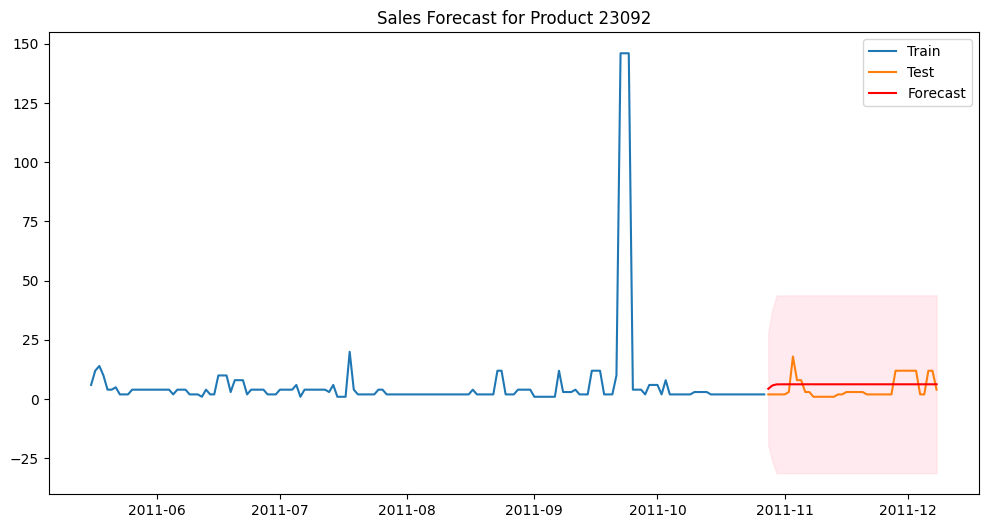

Best Order:  (3, 0, 2)
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  165
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -647.719
Date:                Sat, 09 Dec 2023   AIC                           1309.439
Time:                        16:49:37   BIC                           1331.180
Sample:                    05-16-2011   HQIC                          1318.264
                         - 10-27-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2690      6.463      0.970      0.332      -6.399      18.937
ar.L1          0.0208      0.121      0.171      0.864      -0.217       0.259
ar.L2         -0.0074      0.

In [77]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from itertools import product
import warnings

def optimize_arima(train, d=0, max_p=3, max_q=3):
    """
    Perform grid search to find the best ARIMA model parameters (p, d, q).

    Parameters:
    train (pd.Series): Training time series data.
    d (int): Differencing parameter.
    max_p (int): Maximum value of p to test.
    max_q (int): Maximum value of q to test.

    Returns:
    tuple: Best (p, d, q) parameters and corresponding RMSE.
    """
    best_rmse = float("inf")
    best_order = None
    for p, q in product(range(max_p + 1), range(max_q + 1)):
        try:
            model = ARIMA(train, order=(p, d, q)).fit()
            rmse = sqrt(mean_squared_error(train, model.fittedvalues))
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = (p, d, q)
        except:
            continue

    return best_order, best_rmse

def predict_sales(product_id, data, test_size=0.2, fill_method='ffill', max_p=3, max_q=3):
    """
    Predicts the sales for a particular product using an optimized ARIMA model.

    Parameters:
    product_id (str): The ID of the product to predict sales for.
    data (pd.DataFrame): The dataframe containing the sales data.
    test_size (float): Proportion of the dataset to include in the test split.
    fill_method (str): Method to fill missing values ('ffill', 'bfill', 'interpolate').
    max_p (int): Maximum value of p to test in ARIMA.
    max_q (int): Maximum value of q to test in ARIMA.

    Returns:
    dict: A dictionary containing the model summary, RMSE, and a plot of the predictions.
    """
    # Filter the data for the specified product
    product_data = data[data['Product_ID'] == product_id].copy()
    if product_data.empty:
        return "No data available for the specified product."

    product_data.set_index('Date', inplace=True)

    # Ensure that the date index has a frequency (daily in this case)
    product_data = product_data.asfreq('D')

    # Handling NaN values after setting frequency
    if product_data['Sales'].isnull().any():
        if fill_method == 'ffill':
            product_data.fillna(method='ffill', inplace=True)
        elif fill_method == 'bfill':
            product_data.fillna(method='bfill', inplace=True)
        elif fill_method == 'interpolate':
            product_data.interpolate(inplace=True)

    # Check if NaNs are still present
    if product_data['Sales'].isnull().any():
        return "NaN values still present in the data after handling."

    # Splitting the data into train and test sets
    sales_data = product_data['Sales']
    if len(sales_data) < 10:
        return "Insufficient data for ARIMA modeling."

    train_size = int((1 - test_size) * len(sales_data))
    if train_size < 5:
        return "Insufficient training data."

    train, test = sales_data[:train_size], sales_data[train_size:]
    if test.empty:
        return "Test data is empty. Adjust the test_size parameter."

    # Optimize ARIMA parameters
    best_order, _ = optimize_arima(train, d=0, max_p=max_p, max_q=max_q)

    # Fit the ARIMA model with the best parameters
    model = ARIMA(train, order=best_order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.get_forecast(steps=len(test))
    forecast_series = forecast.predicted_mean

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, forecast_series))

    # Plotting the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast_series, label='Forecast', color='red')
    plt.fill_between(forecast_series.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Sales Forecast for Product {product_id}')
    plt.legend()
    plt.show()

    return {
        'best_order': best_order,
        'model_summary': model_fit.summary(),
        'rmse': rmse
    }

# Example usage:
result = predict_sales(23092, sales_df)
if isinstance(result, dict):
    print("Best Order: ", result['best_order'])
    print(result['model_summary'])
    print("RMSE: ", result['rmse'])
else:
    print(result)


/var/folders/cb/vn84n7fd0mxdxb86fk4ykq4c0000gn/T/ipykernel_15210/4007234563.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  product_data.fillna(method='ffill', inplace=True)
/Users/ioancristianlefter/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ioancristianlefter/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ioancristianlefter/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as star

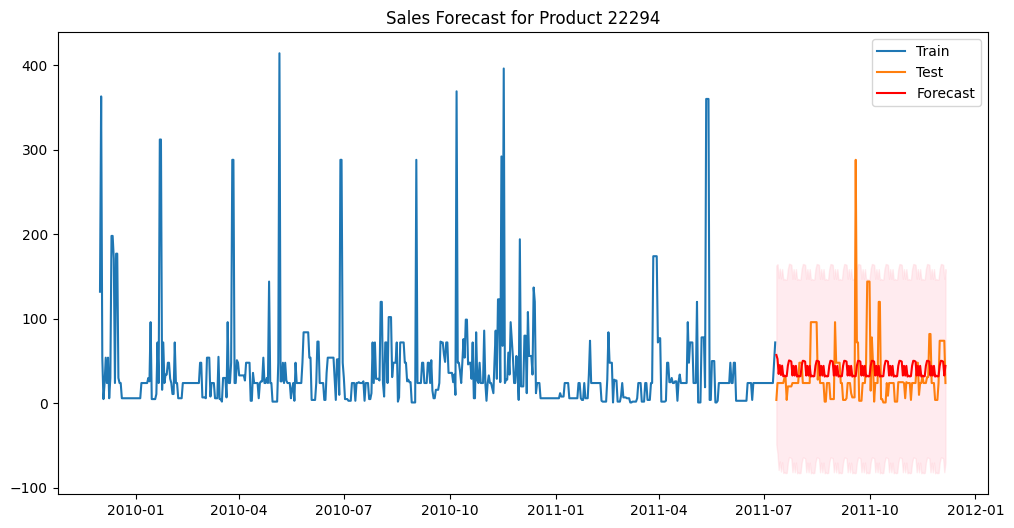

Best Orders:  ((2, 0, 1), (1, 1, 1, 12))
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  588
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -3132.084
Date:                            Sat, 09 Dec 2023   AIC                           6276.169
Time:                                    16:49:51   BIC                           6302.305
Sample:                                12-01-2009   HQIC                          6286.362
                                     - 07-11-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8692      0.612      1.420      0.156      -0.331       

In [78]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from itertools import product

def optimize_sarima(train, d=0, D=1, m=12, max_p=3, max_q=4, max_P=3, max_Q=2):
    """
    Perform grid search to find the best SARIMA model parameters (p, d, q) x (P, D, Q, m).

    Parameters:
    train (pd.Series): Training time series data.
    d, D (int): Differencing parameters for non-seasonal and seasonal parts.
    m (int): Number of periods in each season.
    max_p, max_q, max_P, max_Q (int): Maximum values of p, q, P, Q to test.

    Returns:
    tuple: Best (p, d, q, P, D, Q, m) parameters and corresponding RMSE.
    """
    best_rmse = float("inf")
    best_order = None
    best_seasonal_order = None

    for p, q, P, Q in product(range(max_p + 1), range(max_q + 1), range(max_P + 1), range(max_Q + 1)):
        try:
            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m)).fit(disp=False)
            rmse = sqrt(mean_squared_error(train, model.fittedvalues))
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, m)
        except:
            continue

    return (best_order, best_seasonal_order), best_rmse

def predict_sales_sarima(product_id, data, test_size=0.2, fill_method='ffill', m=12, max_p=2, max_q=2, max_P=1, max_Q=1):
    """
    Predicts the sales for a particular product using an optimized SARIMA model.

    Parameters:
    product_id (str): The ID of the product to predict sales for.
    data (pd.DataFrame): The dataframe containing the sales data.
    test_size (float): Proportion of the dataset to include in the test split.
    fill_method (str): Method to fill missing values ('ffill', 'bfill', 'interpolate').
    m (int): Number of periods in each season for SARIMA.
    max_p, max_q, max_P, max_Q (int): Maximum values of p, q, P, Q to test in SARIMA.

    Returns:
    dict: A dictionary containing the model summary, RMSE, and a plot of the predictions.
    """
    # Filter the data for the specified product
    product_data = data[data['Product_ID'] == product_id].copy()
    if product_data.empty:
        return "No data available for the specified product."

    product_data.set_index('Date', inplace=True)

    # Ensure that the date index has a frequency (daily in this case)
    product_data = product_data.asfreq('D')

    # Handling NaN values after setting frequency
    if product_data['Sales'].isnull().any():
        if fill_method == 'ffill':
            product_data.fillna(method='ffill', inplace=True)
        elif fill_method == 'bfill':
            product_data.fillna(method='bfill', inplace=True)
        elif fill_method == 'interpolate':
            product_data.interpolate(inplace=True)

    # Check if NaNs are still present
    if product_data['Sales'].isnull().any():
        return "NaN values still present in the data after handling."

    # Splitting the data into train and test sets
    sales_data = product_data['Sales']
    if len(sales_data) < 10:
        return "Insufficient data for SARIMA modeling."

    train_size = int((1 - test_size) * len(sales_data))
    if train_size < 5:
        return "Insufficient training data."

    train, test = sales_data[:train_size], sales_data[train_size:]
    if test.empty:
        return "Test data is empty. Adjust the test_size parameter."

    # Optimize SARIMA parameters
    best_orders, _ = optimize_sarima(train, d=0, D=1, m=m, max_p=max_p, max_q=max_q, max_P=max_P, max_Q=max_Q)

    # Fit the SARIMA model with the best parameters
    model = SARIMAX(train, order=best_orders[0], seasonal_order=best_orders[1])
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.get_forecast(steps=len(test))
    forecast_series = forecast.predicted_mean

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, forecast_series))

    # Plotting the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast_series, label='Forecast', color='red')
    plt.fill_between(forecast_series.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Sales Forecast for Product {product_id}')
    plt.legend()
    plt.show()

    return {
        'best_orders': best_orders,
        'model_summary': model_fit.summary(),
        'rmse': rmse
    }

# Example usage:
result = predict_sales_sarima(22294, sales_df)
if isinstance(result, dict):
    print("Best Orders: ", result['best_orders'])
    print(result['model_summary'])
    print("RMSE: ", result['rmse'])
else:
    print(result)


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and 'features' are your predictors
# Let's say 'Sales' is your target variable

# Prepare your features (X) and target (y)
X = sales_df['Product_ID']  # features should be defined based on your dataset
y = sales_df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


ValueError: could not convert string to float: '90162C'

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
file_path = '../doccuments/sales_and_eodStocks.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Preprocess data
# Convert 'Product_ID' to string and apply label encoder
data['Product_ID'] = data['Product_ID'].astype(str)
le = LabelEncoder()
data['Product_ID'] = le.fit_transform(data['Product_ID'])

# Extract year, month, day, and day of week from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Drop original 'Date' column
data.drop('Date', axis=1, inplace=True)

# Split data into features (X) and target (y)
target = 'Sales'
X = data.drop(target, axis=1)
y = data[target]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model


In [82]:
model = xgb.XGBRegressor(objective ='reg:squarederror',
                         colsample_bytree = 0.3,
                         learning_rate = 0.1,
                         max_depth = 5,
                         alpha = 10,
                         n_estimators = 10)
model.fit(X_train, y_train)

# Predict on test set


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [83]:
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(y_pred)
print(rmse)  # Output the RMSE value


[22.491528 19.30082  49.765003 ... 13.489238 11.677608 10.095438]
96.60730880945607


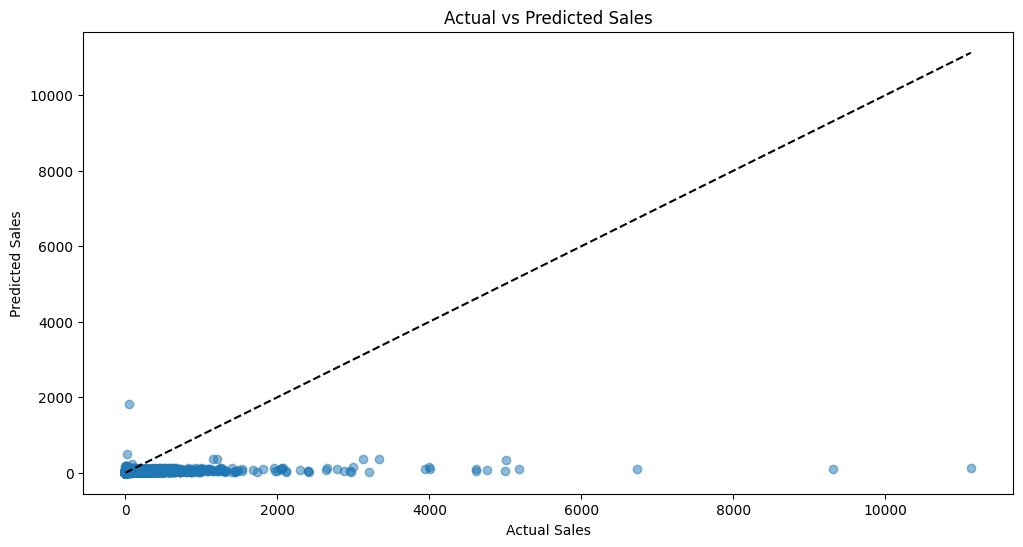

In [84]:
import matplotlib.pyplot as plt

# Assuming y_test contains your actual test data and y_pred contains the predictions from the model
# y_pred = model.predict(X_test)  # Uncomment this line to use the actual predictions

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs predicted values
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()


<Figure size 1500x800 with 0 Axes>

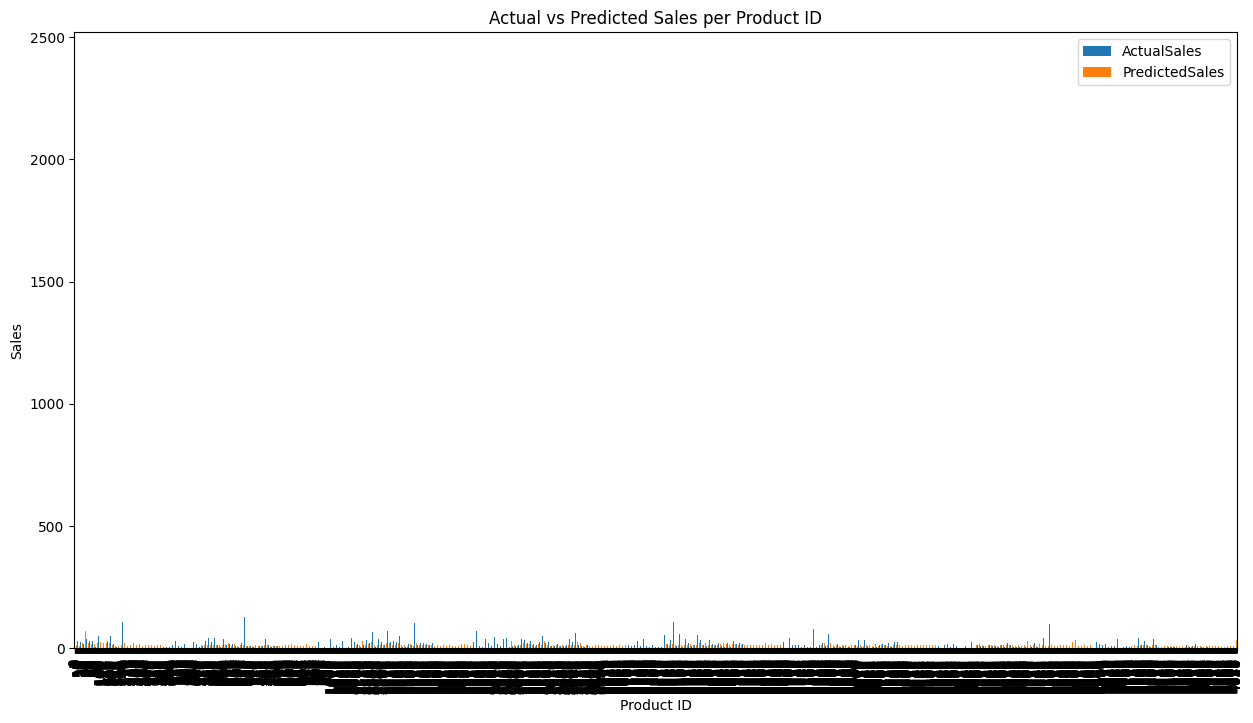

In [85]:
import matplotlib.pyplot as plt

# Add predictions to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['ActualSales'] = y_test
X_test_with_predictions['PredictedSales'] = y_pred  # Replace with your model's predictions

# Group by Product_ID and calculate mean actual and predicted sales
grouped_data = X_test_with_predictions.groupby('Product_ID').agg({'ActualSales':'mean', 'PredictedSales':'mean'})

# Plotting
plt.figure(figsize=(15, 8))
grouped_data.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales per Product ID')
plt.show()


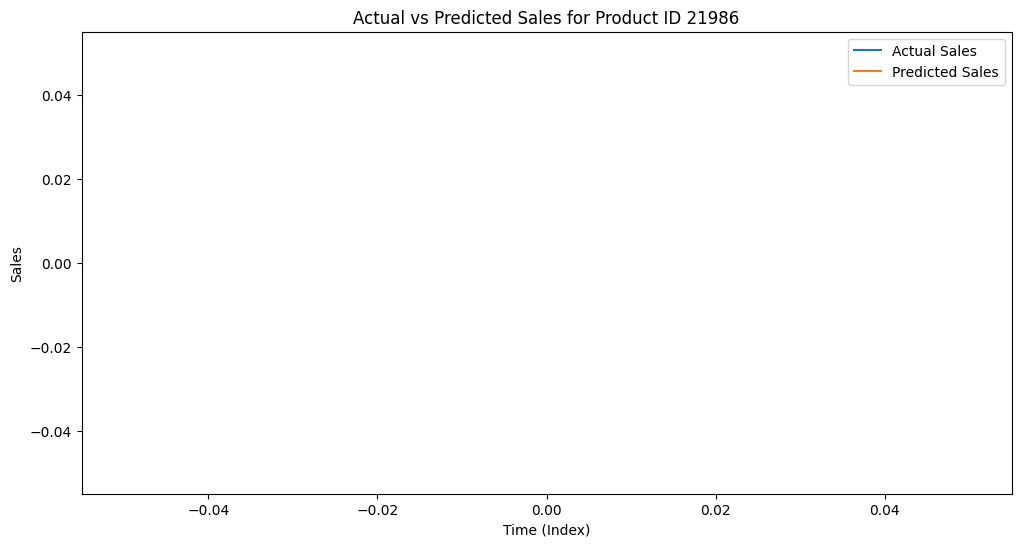

In [86]:
def plot_sales_predictions_for_product(product_id, X_test, y_test, y_pred):
    """
    Plots actual vs predicted sales for a specific product ID.

    Parameters:
    product_id (int/str): The product ID for which the plot will be made.
    X_test (DataFrame): The test feature data.
    y_test (Series): The actual sales data.
    y_pred (array): The predicted sales data.
    """
    import matplotlib.pyplot as plt

    # Filter the data for the specified product ID
    product_data = X_test[X_test['Product_ID'] == product_id]
    product_data['ActualSales'] = y_test[product_data.index]
    product_data['PredictedSales'] = y_pred[product_data.index]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['ActualSales'].reset_index(drop=True), label='Actual Sales')
    plt.plot(product_data['PredictedSales'].reset_index(drop=True), label='Predicted Sales')
    plt.xlabel('Time (Index)')
    plt.ylabel('Sales')
    plt.title(f'Actual vs Predicted Sales for Product ID {product_id}')
    plt.legend()
    plt.show()

# Example usage (assuming you have X_test, y_test, and y_pred available):
# plot_sales_predictions_for_product(your_product_id, X_test, y_test, y_pred)
plot_sales_predictions_for_product(21986, X_test, y_test, y_pred)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import matplotlib.pyplot as plt
from itertools import product
from datetime import date
import numpy as np



def optimize_sarima(train, d=0, D=1, m=12, max_p=3, max_q=4, max_P=3, max_Q=2):
    """
    Perform grid search to find the best SARIMA model parameters (p, d, q) x (P, D, Q, m).

    Parameters:
    train (pd.Series): Training time series data.
    d, D (int): Differencing parameters for non-seasonal and seasonal parts.
    m (int): Number of periods in each season.
    max_p, max_q, max_P, max_Q (int): Maximum values of p, q, P, Q to test.

    Returns:
    tuple: Best (p, d, q, P, D, Q, m) parameters and corresponding RMSE.
    """
    best_rmse = float("inf")
    best_order = None
    best_seasonal_order = None

    for p, q, P, Q in product(range(max_p + 1), range(max_q + 1), range(max_P + 1), range(max_Q + 1)):
        try:
            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m)).fit(disp=False)
            rmse = sqrt(mean_squared_error(train, model.fittedvalues))
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, m)
        except:
            continue

    return (best_order, best_seasonal_order), best_rmse


def predict_sales_sarima(product_ID, train, test, m=12, max_p=2, max_q=2, max_P=1,
                         max_Q=1):


    """
    Predicts the sales for a particular product using an optimized SARIMA model.

    Parameters:
    product_ID (str): The ID of the product to predict sales for.
    data (pd.DataFrame): The dataframe containing the sales data.
    test_size (float): Proportion of the dataset to include in the test split.
    fill_method (str): Method to fill missing values ('ffill', 'bfill', 'interpolate').
    m (int): Number of periods in each season for SARIMA.
    max_p, max_q, max_P, max_Q (int): Maximum values of p, q, P, Q to test in SARIMA.

    Returns:
    dict: A dictionary containing the model summary, RMSE, and a plot of the predictions.
    """

    # Optimize SARIMA parameters
    best_orders, _ = optimize_sarima(train, d=0, D=1, m=m, max_p=max_p, max_q=max_q, max_P=max_P, max_Q=max_Q)

    # Fit the SARIMA model with the best parameters
    model = SARIMAX(train, order=best_orders[0], seasonal_order=best_orders[1])
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.get_forecast(steps=len(test))
    forecast_series = forecast.predicted_mean

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, forecast_series))

    # Plotting the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast_series, label='Forecast', color='red')
    plt.fill_between(forecast_series.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1],
                     color='pink', alpha=0.3)
    plt.title(f'Sales Forecast for Product {product_ID}')
    plt.legend()
    plt.show()

    return {
        'best_orders': best_orders,
        'model_summary': model_fit.summary(),
        'rmse': rmse
    }

def dataSplitForTime(product_ID,begin_date,end_date, data, test_size=0.2, fill_method='bfill'):

    # Filter the data for the specified product
    product_data = data[(data['Product_ID'] == product_ID) & (data['Date']>=begin_date) & (data['Date']<=end_date)].copy()
    if product_data.empty:
        return "No data available for the specified product."

    product_data.set_index('Date', inplace=True)

    # Ensure that the date index has a frequency (daily in this case)
    product_data = product_data.asfreq('D')

    # Handling NaN values after setting frequency
    if product_data['Sales'].isnull().any():
        if fill_method == 'ffill':
            product_data.fillna(method='ffill', inplace=True)
        elif fill_method == 'bfill':
            product_data.fillna(method='bfill', inplace=True)
        elif fill_method == 'interpolate':
            product_data.interpolate(inplace=True)

    # Check if NaNs are still present
    if product_data['Sales'].isnull().any():
        return "NaN values still present in the data after handling."

    # Splitting the data into train and test sets
    sales_data = product_data['Sales']
    if len(sales_data) < 10:
        return "Insufficient data for SARIMA modeling."

    train_size = int((1 - test_size) * len(sales_data))
    if train_size < 5:
        return "Insufficient training data."

    train, test = sales_data[:train_size], sales_data[train_size:]
    if test.empty:
        return "Test data is empty. Adjust the test_size parameter."
    return train,test

from statsmodels.tsa.seasonal import seasonal_decompose

train, test = dataSplitForTime(22294,np.datetime64(pd.Timestamp('2009-10-28')),np.datetime64(pd.Timestamp('2010-10-28'),),sales_df,fill_method='ffill')
print(train)
print(test)
result = predict_sales_sarima(22294, train, test)
if isinstance(result, dict):
    print("Best Orders: ", result['best_orders'])
    print(result['model_summary'])
    print("RMSE: ", result['rmse'])
else:
    print(result)
